In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

from sklearn.feature_extraction import DictVectorizer

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, make_scorer


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

import numpy as np

import json

import Feature_Extraction as fe

In [19]:
import scipy.stats as stats

In [2]:
# load the dataset

data = open('data/tousend_cons_rels.CSV', encoding="ANSI").read()
label, r1, r2, rmix = [], [], [], []
size = 500
for i, line in enumerate(data.split("\n")):
    if i >= size:
        break
    if line != '' and line.isspace() != True:
        content = line.split(';')
        label.append(content[0])
        r1.append(content[1])
        r2.append(content[2])
        rmix.append(content[1]+content[2])
        
index = 0
size = len(label)
x = []
while index < size:
    x.append(fe.createFBag(r1[index], r2[index]))
    index = index + 1
    
vec = DictVectorizer()

xx = vec.fit_transform(x).toarray()

yy = []
for l in label:
    if l == 'true':
        yy.append(1)
    else:
        yy.append(-1)

In [57]:
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import array

In [44]:
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [45]:
feature_names = ['subjsubj', 'subjobj', 'objsubj', 'objobj', 'asubjsubj', 'asubjobj', 'aobjsubj', 'aobjobj',
                 'noun_ovlap_1_2' , 'noun_ovlap_2_1', 'verb_ovlap_1_2', 'verb_ovlap_2_1', 
                 'M_1', 'root_1', 'M_2', 'root_2']

In [88]:
X_tmp = []
for instance in x:
    tmp = []
    for feature in instance:
        tmp.append(instance[feature])
    X_tmp.append(tmp)
X = np.array(X_tmp)


le = preprocessing.LabelEncoder()
for i in range(len(X[0])):
    X[:,i] = le.fit_transform(X[:, i])

In [128]:
pipe = PipelineRFE(
    [
        ('std_scaler', preprocessing.StandardScaler()),
        ("ET", ExtraTreesRegressor(n_estimators=250))
    ]
)
#SVC(kernel='linear', C=1)
#neg_mean_squared_error
feature_selector_cv = feature_selection.RFECV(pipe, cv=10, step=1, scoring="neg_mean_squared_error")
feature_selector_cv.fit(X, yy)

feature_selector_cv.n_features_

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be conve

10

In [107]:
for i in range(len(feature_selector_cv.support_)):
    if feature_selector_cv.support_[i]:
        print(feature_names[i])

subjsubj
subjobj
objobj
noun_ovlap_1_2
noun_ovlap_2_1
verb_ovlap_1_2
verb_ovlap_2_1
M_1
root_1
root_2


In [155]:
from sklearn.feature_selection import RFE, RFECV
clf = SVC(kernel='linear', C=1)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10),scoring='recall')
rfecv.fit(xx, yy)
print("Optimal number of features : %d" % rfecv.n_features_)
#neg_mean_squared_error
#feature_selector_cv = feature_selection.RFECV(pipe, cv=10, step=1, scoring="precision")
#feature_selector_cv.fit(xx, yy)

Optimal number of features : 9


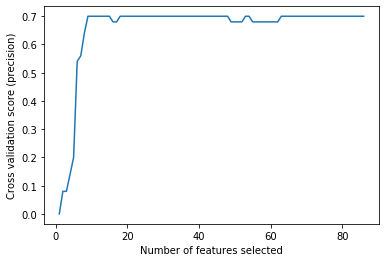

In [156]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [3]:
index = 0
size = len(label)
x_NoOVLAP = []
while index < size:
    x_NoOVLAP.append(fe.createFBagNoOVLAP(r1[index], r2[index]))
    index = index + 1
    
vec = DictVectorizer()
xx_NoOVLAP = vec.fit_transform(x_NoOVLAP).toarray()

In [5]:
index = 0
size = len(label)
x_NoSUBJOBJ = []
while index < size:
    x_NoSUBJOBJ.append(fe.createFBagNoSUBJOBJ(r1[index], r2[index]))
    index = index + 1
    
vec = DictVectorizer()
xx_NoSUBJOBJ = vec.fit_transform(x_NoSUBJOBJ).toarray()

In [6]:
index = 0
size = len(label)
x_NoModal = []
while index < size:
    x_NoModal.append(fe.createFBagNoModal(r1[index], r2[index]))
    index = index + 1
    
vec = DictVectorizer()
xx_NoModal = vec.fit_transform(x_NoModal).toarray()

In [135]:
kfold = 10
skf = StratifiedShuffleSplit(n_splits=kfold)
clf = SVC(kernel='linear', C=1)
myscores = ['precision', 'recall', 'f1']

nested_score = cross_validate(clf, X=xx, y=yy, cv=skf, scoring=myscores)
#nested_score_NoOVLAP = cross_validate(clf, X=xx_NoOVLAP, y=yy, cv=skf, scoring=myscores)
#nested_score_NoSUBJOBJ = cross_validate(clf, X=xx_NoSUBJOBJ, y=yy, cv=skf, scoring=myscores)
#nested_score_NoModal = cross_validate(clf, X=xx_NoModal, y=yy, cv=skf, scoring=myscores)


print("ALL INCLUDED:")
print(stats.describe(nested_score['test_precision']))
print(stats.describe(nested_score['test_recall']))
print(stats.describe(nested_score['test_f1']))
print()

#print("NO OVERLAP:")
#print(stats.describe(nested_score_NoOVLAP['test_precision']))
#print(stats.describe(nested_score_NoOVLAP['test_recall']))
#print(stats.describe(nested_score_NoOVLAP['test_f1']))
#print()
#print("NO SUBJECT OBJECT:")
#print(stats.describe(nested_score_NoSUBJOBJ['test_precision']))
#print(stats.describe(nested_score_NoSUBJOBJ['test_recall']))
#print(stats.describe(nested_score_NoSUBJOBJ['test_f1']))
#print()
#print("NO MODAL FEATURES:")
#print(stats.describe(nested_score_NoModal['test_precision']))
#print(stats.describe(nested_score_NoModal['test_recall']))
#print(stats.describe(nested_score_NoModal['test_f1']))

ALL INCLUDED:
DescribeResult(nobs=10, minmax=(0.75, 1.0), mean=0.925, variance=0.014583333333333334, skewness=-0.8728715609439706, kurtosis=-1.238095238095237)
DescribeResult(nobs=10, minmax=(0.2, 1.0), mean=0.6799999999999999, variance=0.046222222222222234, skewness=-0.8598938232981903, kurtosis=0.7307692307692286)
DescribeResult(nobs=10, minmax=(0.33333333333333337, 1.0), mean=0.7638888888888887, variance=0.03690843621399178, skewness=-1.017482691454412, kurtosis=0.5089050492296812)



In [157]:
xx_NoModal

array([[0.5, 0. , 0.5, ..., 0. , 0.5, 0. ],
       [0.5, 0. , 0.5, ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.3, 0. ]])

In [166]:
a = np.array([])
b = np.array([2, 6])
np.concatenate((a, b), axis=None)

array([2., 6.])